# Worksheet 15

Name:  Ivanna Morales Roman
UID: U69469925

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [8]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05
expanding_rate = .99
retracting_rate = 1.1

def snap(x, w, b, error):
    """
        Plot the street induced by w and b.
        Circle the point x in red if it was
        misclassified or in yellow if it was
        classified correctly.
    """

    xplot = np.linspace(-3, 3)
    cs = np.array([x for x in 'gb'])

    svm = -(w[0] * xplot + b) / w[1]
    margin = 1 / np.linalg.norm(w)
    left_svm = svm - margin
    right_svm = svm + margin

    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='y',fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:,0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:,1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE)))


images = []
for _ in range(epochs):
    # pick a point from X at random
    i =  np.random.randint(len(X))
    x, y = X[i], Y[i]
    w = np.array([1, 1], dtype=float)
    error = False
    if y * (np.dot(w, x) + b) <= 0:
            error = True
            w += alpha * y * x
            b += alpha * y
            alpha *= expanding_rate
    else:
            error = False
            alpha *= retracting_rate

                    
    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


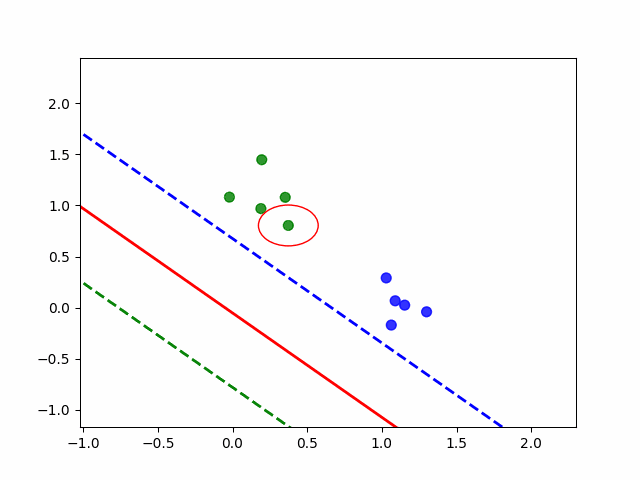

In [9]:
from IPython.display import Image

# Display the GIF in Jupyter Notebook
Image(filename='svm.gif')

b) Consider the following dataset:

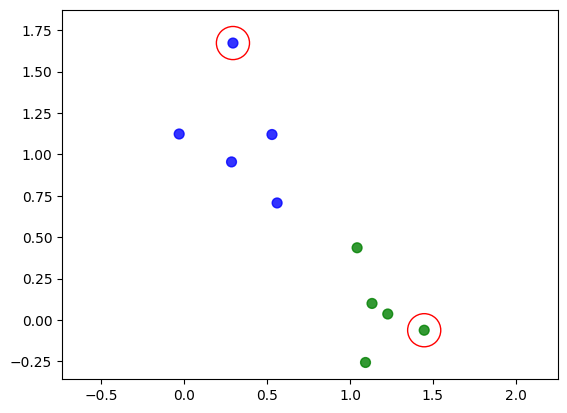

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

- If the points are moved to the opposite class, then the SVM will move the hyperplane to adjust. 
- If the points are moved closer into their classes, the fit will remain the same as the boundary remains unchanged.
- If they are moved closer to the boundary, the fit will only change (the margins would increase) if the points become support vectors. 

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

The points closest the the hypothetical decision boundary would affect it the most, meaning that the points at the divind edges of the classes would likely be the support vectors. 

Point 1: [ 1.44822372 -0.06154748], Label: 1
Point 2: [0.2936214  1.67226796], Label: 0
Point 3: [1.04321307 0.43628205], Label: 1
Point 4: [1.22831132 0.0365025 ], Label: 1
Point 5: [0.28502653 0.95459284], Label: 0
Point 6: [-0.03096566  1.12317955], Label: 0
Point 7: [0.5602674  0.70681664], Label: 0
Point 8: [1.13315897 0.1001023 ], Label: 1
Point 9: [0.5292157  1.12004716], Label: 0
Point 10: [ 1.09392031 -0.25622872], Label: 1


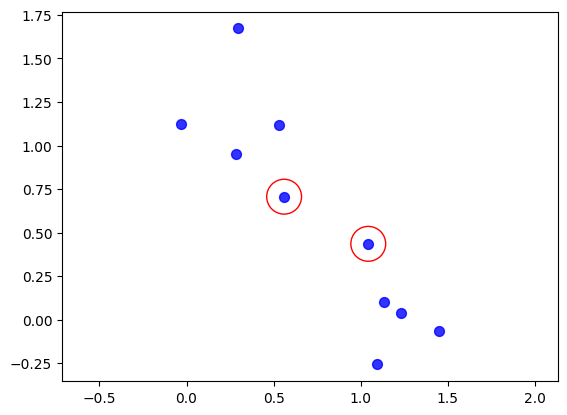

In [6]:

# Now let's print the data points
for i in range(len(X)):
    print(f"Point {i+1}: {X[i]}, Label: {Y[i]}")
    

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.8)

# Circle points 3 and 7 in red
# Remember that Python uses 0-based indexing, so we access points 3 and 7 using indices 2 and 6.
plt.gca().add_patch(plt.Circle((X[2][0], X[2][1]), 0.1, color='red', fill=False))
plt.gca().add_patch(plt.Circle((X[6][0], X[6][1]), 0.1, color='red', fill=False))

# Set equal scaling and show plot
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()